# Project 1 - Classification
## CS (STAT) 5525 Due - April 1, 2021
## Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of classification algorithms on several synthetic and real-world data sets. This will be done in the following steps:
- First, you will explore the data sets.
- Next, you will perform a series of experiments on which you will be asked to answer
a series of questions. For these experiments, you will be running a Python Jupyter notebook.
- Third, you will compile your answers in the form of a report.

## Python Jupyter Notebooks
We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:
- Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
- Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handling-issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
- Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/,
https://www.youtube.com/watch?v=3C9E2yPBw7s
1

## Before you Begin
- Visually explore the data sets in the experiments below, and consider the following:
    - Types of attributes 
    - Class distribution
    - Which attributes appear to be good predictors, if any
    - Possible correlation between attributes
    - Any special structure that you might observe - Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow
- Use precision and recall as evaluation metrics to report classification performance.
- Your goal is to learn everything that you can about the dataset. Answer the questions
below as a starting point, but you should dig further. What more can you discover? The goal of this assignment is to give a helping hand for you to discover the most interesting and surprising things.
Report and Submission
- Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
- Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

## 1 Problem 1 [37 points]
The files for this problem are under the Experiment 1 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to use as a starting point: Exploratory data analysis.ipynb. In this experiment, we will do exploratory data analysis to get a better sense of data. The dataset contains record of telecom customer along with the label "churn". Churn = "true" signifies that the customer has left the company and churn = "false" signifies that the customer is still loyal to the company. Answer the following questions

In [194]:
import pandas as pd
import numpy as np

In [195]:
df = pd.read_csv('Experiment_-_1/telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. How many records are there in the dataset?

In [196]:
len(df)
num_records = len(df)
print( num_records)

3333


In [197]:
df.shape[0]

3333

2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [198]:
df.shape[1]

21

In [199]:
len(df.columns)

21

In [200]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [201]:
#df.dtypes

In [202]:


feature_types = {
    'state': 'categorical',
    'account length': 'count',
    'area code': 'categorical',
    'phone number': 'categorical',
    'international plan': 'categorical',
    'voice mail plan': 'categorical',
    'number vmail messages': 'count',
    'total day minutes': 'continuous',
    'total day calls': 'count',
    'total day charge': 'continuous',
    'total eve minutes': 'continuous',
    'total eve calls': 'count',
    'total eve charge': 'continuous',
    'total night minutes': 'continuous',
    'total night calls': 'count',
    'total night charge': 'continuous',
    'total intl minutes': 'continuous',
    'total intl calls': 'count',
    'total intl charge': 'continuous',
    'customer service calls': 'count'
    
}

for feature, feature_type in feature_types.items():
    print(f"{feature}: {feature_type}")


state: categorical
account length: count
area code: categorical
phone number: categorical
international plan: categorical
voice mail plan: categorical
number vmail messages: count
total day minutes: continuous
total day calls: count
total day charge: continuous
total eve minutes: continuous
total eve calls: count
total eve charge: continuous
total night minutes: continuous
total night calls: count
total night charge: continuous
total intl minutes: continuous
total intl calls: count
total intl charge: continuous
customer service calls: count


3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [203]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [204]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [205]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


4. What is the average number of customer service calls made by a customer to the company?

In [206]:
df["customer service calls"].mean()

1.5628562856285628

5. What is the distribution of the class variable, "churn"? Calculate the probability of P(churn = True) and P(churn = False).

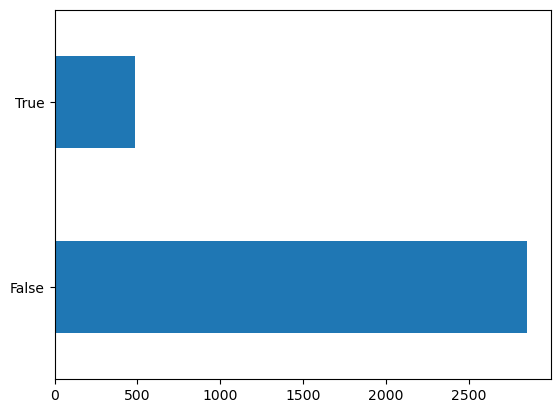

In [207]:
df["churn"].value_counts().plot.barh();

In [208]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

6. What is the distribution of the feature, "international plan"? Calculate the probability of P(international plan = 'yes') and P(international plan = 'no').

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

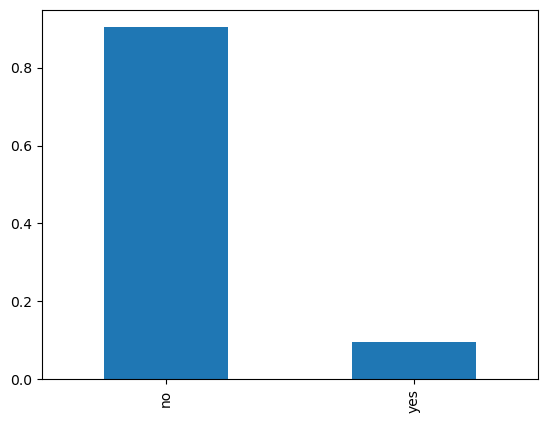

In [209]:
df["international plan"].value_counts(normalize=True).plot.bar()
df["international plan"].value_counts(normalize=True)

7. Assume you have devised a classification model that states that if "international plan" = 'no', then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

In [210]:
df['predicted_churn'] = df['international plan'].apply(lambda x: False if x == 'no' else True)
df['predicted_churn']
num_accurate= (df['predicted_churn'] == df['churn']).sum()
accuracy= num_accurate/len(df)
accuracy

0.8403840384038403

There is a 84% probability that if there is no international plan churn will be False

8. Calculate the following conditional probabilities:
- P(churn = True | international plan = `yes')
- P(churn = False | international plan = `yes')
- P(churn= True | international plan = `no')
- P(churn = False | international plan = `no')

Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: "Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?"

In [211]:
ct=pd.crosstab(df["churn"],df["international plan"], normalize="columns")
ct

international plan,no,yes
churn,,
False,0.88505,0.575851
True,0.11495,0.424149


In [212]:
P_True_yes = ct.iloc[1,1]
P_True_yes
P_True_no = ct.iloc[1,0]
P_True_no 
P_False_no = ct.iloc[0,0]
P_False_yes = ct.iloc[0,1]
print("P_True_yes  =  ",P_True_yes)
print("P_True_no  =  ",P_True_no)
print("P_False_yes  =  ",P_False_yes)
print("P_False_no  =  ",P_False_no)


P_True_yes  =   0.4241486068111455
P_True_no  =   0.11495016611295682
P_False_yes  =   0.5758513931888545
P_False_no  =   0.8850498338870432


In [213]:
ct=pd.crosstab(df["international plan"],df["churn"], normalize="columns")
ct

churn,False,True
international plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


In [214]:
P_yes_True = ct.iloc[1,1]

P_no_True = ct.iloc[0,1]

P_no_False = ct.iloc[0,0]
P_yes_False = ct.iloc[1,0]
print("P_yes_True  =  ",P_yes_True)
print("P_no_True  =  ",P_no_True)
print("P_no_False  =  ",P_no_False)
print("P_yes_False  =  ",P_yes_False)

P_yes_True  =   0.2836438923395445
P_no_True  =   0.7163561076604554
P_no_False  =   0.9347368421052632
P_yes_False  =   0.06526315789473684


In [215]:
P_True = df['churn'].mean()
P_False = 1 - P_True
P_False
P_True

0.14491449144914492

In [216]:
P_yes_churn_True = P_True_yes * P_True / (P_True_yes * P_True + P_yes_False * P_False)
P_no_churn_True = P_True_no * P_True / (P_True_no * P_True + P_no_False * P_False)
P_yes_churn_False = P_False_yes * P_False / (P_False_yes * P_False + P_yes_True * P_True)
P_no_churn_False = P_False_no * P_False / (P_False_no * P_False + P_no_True * P_True)
print("Given that a customer has churned (churn = True):")
print("P(international plan = 'yes') = {:.2f}".format(P_yes_churn_True))
print("P(international plan = 'no') = {:.2f}".format(P_no_churn_True))

print("\nGiven that a customer has not churned (churn = False):")
print("P(international plan = 'yes') = {:.2f}".format(P_yes_churn_False))
print("P(international plan = 'no') = {:.2f}".format(P_no_churn_False))


Given that a customer has churned (churn = True):
P(international plan = 'yes') = 0.52
P(international plan = 'no') = 0.02

Given that a customer has not churned (churn = False):
P(international plan = 'yes') = 0.92
P(international plan = 'no') = 0.88


9. Assume you have devised a classification model which states that if "international plan" = "yes" and the number of calls to the service center is greater than 3, then the customer will churn (i.e., "churn" = True). Report the accuracy of this classification model on the given dataset.

In [217]:
filt_df = df[df['international plan'].eq('yes') & df['customer service calls'].gt(3)]
normalized_counts = filt_df['churn'].value_counts(normalize=True)
print(normalized_counts)

cont_table = pd.crosstab(df['churn'], (df['international plan'] == 'yes') & (df['customer service calls'] > 3))


TP = cont_table.iloc[1, 1]

TN = cont_table.iloc[0, 0]

FP = cont_table.iloc[0, 1]

FN = cont_table.iloc[1, 0]


accuracy = (TP + TN) / (TP + TN + FP + FN)


print('Accuracy:', np.round(accuracy, 4))


True     0.678571
False    0.321429
Name: churn, dtype: float64
Accuracy: 0.8581


In [218]:
cont_table

col_0,False,True
churn,,
False,2841,9
True,464,19


The calssification model is true/accurate only 85.81% of times 

## 2 Problem 2 [23 points]
The files for this problem are under the Experiment 2 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point: Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation. To visualize decision tree we need additional packages to be installed i.e., Graphviz and pydotplus (check the Anaconda.org page for instructions on how to install them using conda). Answer the following questions:
1. Consider training decision trees for the synthetic dataset involving two classes. How does the decision boundary look like when we overfit ( max depth  4 ) and underfit (max depth = 1) the decision tree on the given data? For both cases, paste the decision tree and the decision boundary from Jupyter notebook output.

In [219]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# generate the dataset
df = pd.read_csv('Experiment_-_2/telecom_churn.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [220]:

np.random.seed(17)
train_dataset = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)


train_dataset = np.r_[train_dataset, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
import graphviz


In [221]:
def treeGraphtoPNG(tree, feature_names, pngFileToSave):
    treeStructure = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(treeStructure)  
    graph.write_png(pngFileToSave)
    
    
        
def getGrid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

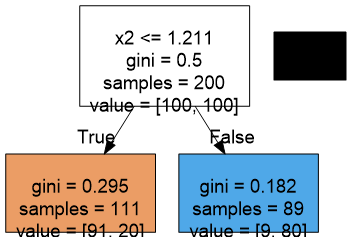

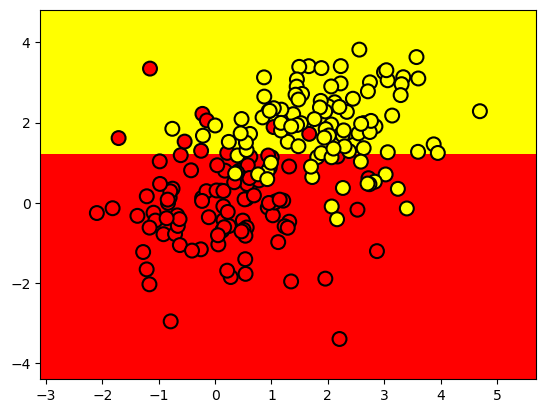

In [222]:
decisionTreeUnderfit = DecisionTreeClassifier(random_state=17, max_depth=1)
decisionTreeOverfit = DecisionTreeClassifier(random_state=17, max_depth=5)

decisionTreeUnderfit.fit(train_dataset, train_labels)
decisionTreeOverfit.fit(train_dataset, train_labels)


xx, yy = getGrid(train_dataset)
predicted_underfit = decisionTreeUnderfit.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_overfit = decisionTreeOverfit.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)


plt.pcolormesh(xx, yy, predicted_underfit, cmap='autumn')
plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.savefig('P2underFitBoundary.png')

treeGraphtoPNG(decisionTreeUnderfit, ['x1', 'x2'],'P2underFitTree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "P2underFitTree.png"
Image(filename = PATH , width=400, height=400)

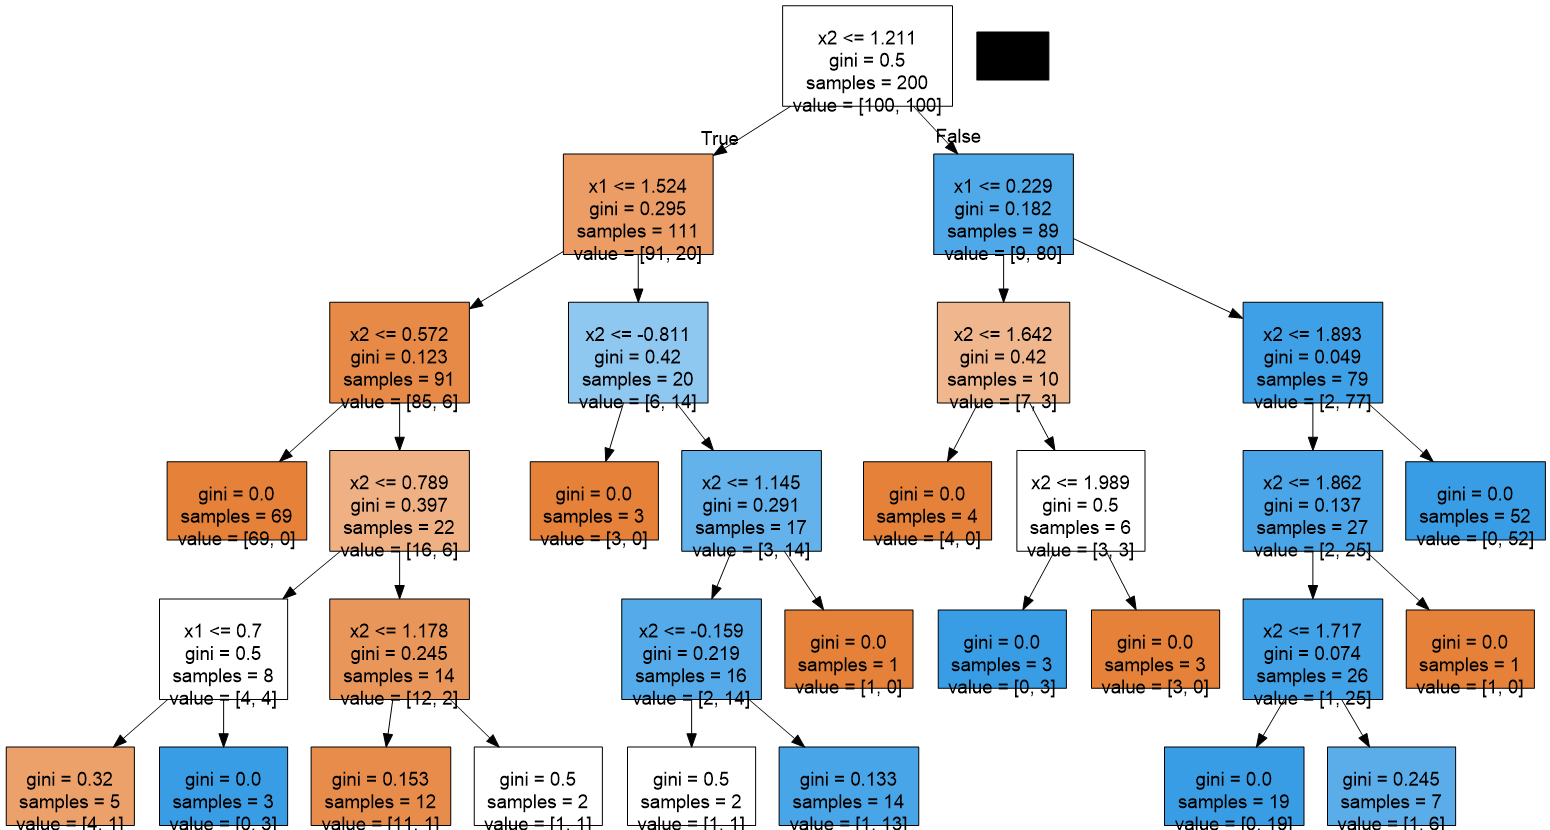

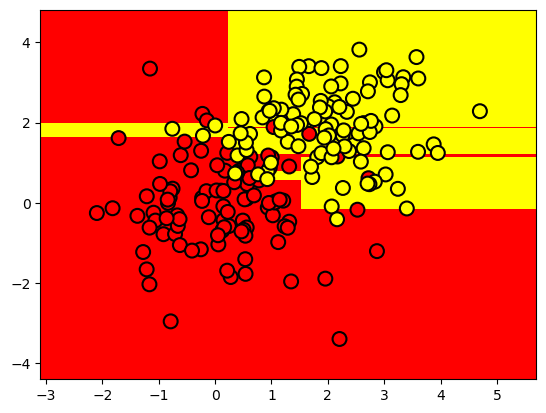

In [223]:
# Plotting tree and decision boundary for overfit tree
plt.pcolormesh(xx, yy, predicted_overfit, cmap='autumn')
plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.savefig('P2overFitBoundary.png')

treeGraphtoPNG(decisionTreeOverfit,['x1', 'x2'],'P2overFitTree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "P2overFitTree.png"
Image(filename = PATH , width=900, height=600)


2. Decision tree classifier sklearn.tree.DecisionT reeClassif ier has parameter "max depth" which defines the maximum depth of the tree. What happens if we don't specify any value for this parameter? Paste the decision tree and the decision boundary you will obtain for this default case from Jupyter notebook output.

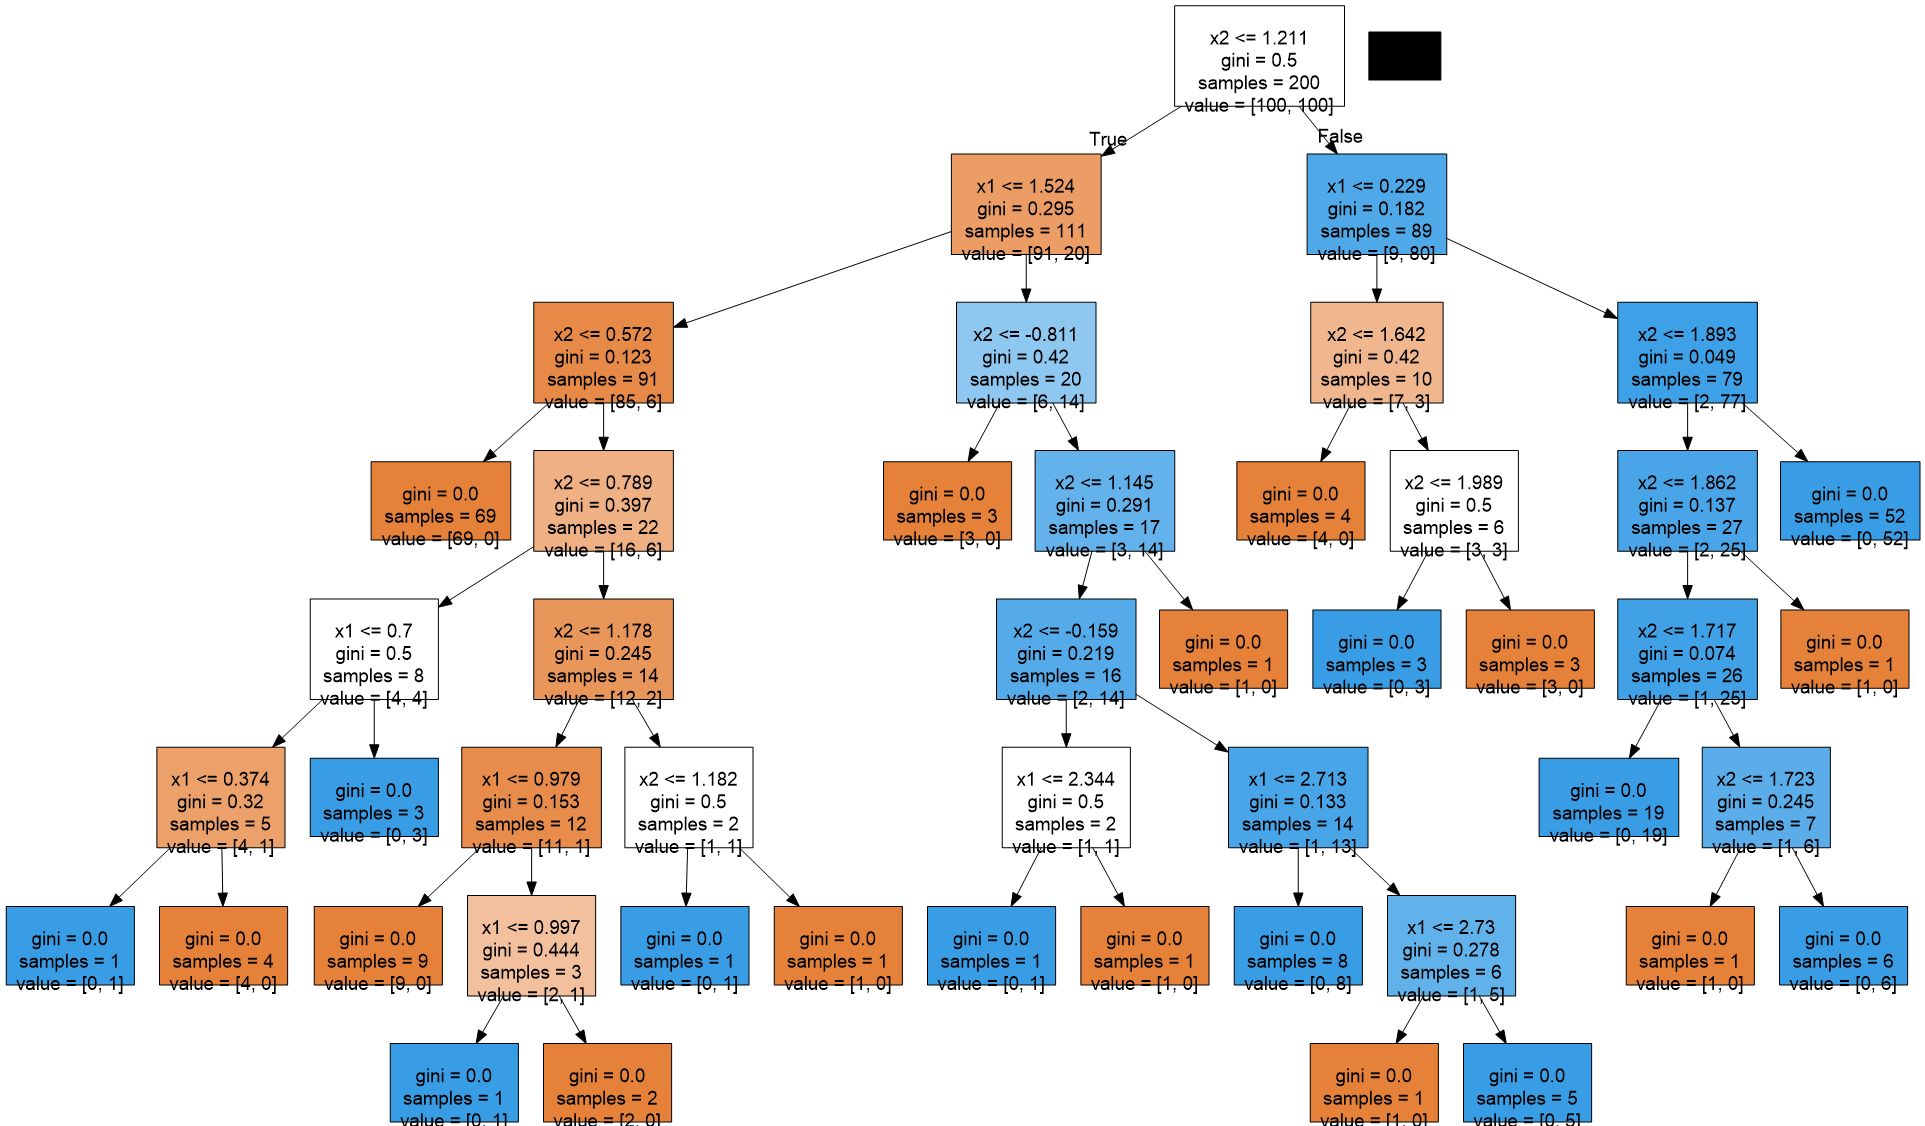

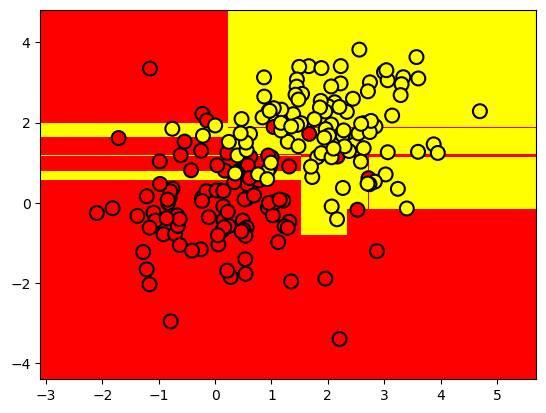

In [224]:
defaultDecisionTree = DecisionTreeClassifier(random_state=17)

# training the tree
defaultDecisionTree.fit(train_dataset, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_dataset)
predicted_tree = defaultDecisionTree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

# Plotting tree and decision boundary
plt.pcolormesh(xx, yy, predicted_tree, cmap='autumn')
plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.savefig('P2defaultBoundary')

treeGraphtoPNG(defaultDecisionTree,['x1', 'x2'],'P2defaultTree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "P2defaultTree.png"
Image(filename = PATH , width=900, height=600)

If we don't specify a value for the "max_depth" parameter in the DecisionTreeClassifier, then the decision tree will continue to split until all the leaves are pure,This can lead to overfitting and a complex tree structure, which may not generalize well to new data.

3. For Bank Dataset, what are the 5 different age values that the decision tree used to construct the splits of the tree? What is the significance of these 5 values?

In [225]:
dataSet = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
dataSet.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


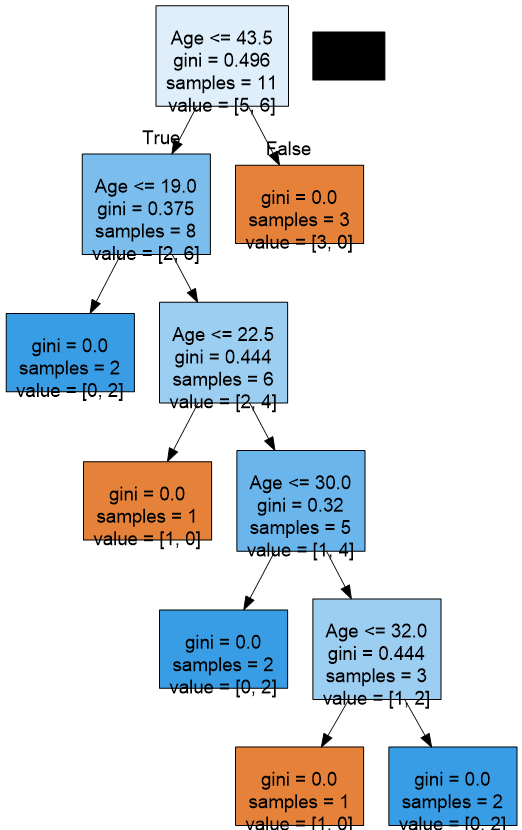

In [226]:
ageDecisionTree = DecisionTreeClassifier(random_state=17)
ageDecisionTree.fit(dataSet['Age'].values.reshape(-1, 1), dataSet['Loan Default'].values)

treeGraphtoPNG(ageDecisionTree,['Age'], 'P2AgeTree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "P2AgeTree.png"
Image(filename = PATH , width=500, height=200)

In decision trees, mean values of numeric features represent the age where the target class switches from 1 to 0 or vice versa. These values are used as thresholds for "cutting" a quantitative variable. The feature values are sorted in ascending order, and only thresholds where the target value changes are considered.

4. For the customer churn prediction task, we show that the accuracy of the decision tree is 94% when max depth is set to 5. What happens to accuracy when we leave the value of max depth to its default value? Explain the rise/fall of accuracy.

In [227]:

from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
df = pd.read_csv("Experiment_-_1/telecom_churn.csv")
X = df.select_dtypes("number")
Y = df["churn"]
X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size = 0.3, random_state = 17,)
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
pred = dt.predict(X_holdout)
print("with max_dept = 5, the accuracy score is ",accuracy_score(Y_holdout, pred))

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_holdout)
print("with max_dept = 0, the accuracy score is ",accuracy_score(Y_holdout, pred))

with max_dept = 5, the accuracy score is  0.912
with max_dept = 0, the accuracy score is  0.872


at default max deapth (0) we underfit data hence we get a lower accuracy score

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler sklearn.preprocessing.StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1, 1]], write down its scaler transformation.

In [228]:
from sklearn.preprocessing import StandardScaler
d = [[0,0],[0,0],[1,1],[1,1]]
np.array(d)
ss = StandardScaler()
d_scaled = ss.fit_transform(d)
print("mean",d_scaled.mean(),
"\n stdev ",d_scaled.std(),
"\n scaled d vector\n", d_scaled)

mean 0.0 
 stdev  1.0 
 scaled d vector
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


6. How many decision trees do we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation with the above scenario, how many decision trees do we construct in total?

In [229]:
nrow = len(range(1,11))
ncol = len(range(4,19))
total = nrow*ncol
total*10
print('Number of Decision Trees needed to be constrcuted:',total*10)

Number of Decision Trees needed to be constrcuted: 1500


7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario?

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 11)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, Y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


({'knn__n_neighbors': 5}, 0.8859854737537141)

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

In [231]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
print (f"K-Nearest neighbor accuracy is {accuracy_score(y_holdout, knn_pred)}")
print (f"Decision tree accuracy is {accuracy_score(y_holdout, tree_pred)}")

K-Nearest neighbor accuracy is 0.975925925925926
Decision tree accuracy is 0.6666666666666666


In [232]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(1, 11)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

print(f"Best parameters: {tree_grid.best_params_}")
print(f"Test accuracy: {accuracy_score(y_holdout, tree_grid.predict(X_holdout))}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'max_depth': 10}
Test accuracy: 0.8481481481481481


## 3 Problem 3 [10 points]
The files for this problem are under Experiment 3 folder. Datasets to be used for experimentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or spam. In this experiment we will learn about text features, how to convert them in matrix form, and apply the Naive Bayes algorithm. Answer the following questions: 
1. What is the distribution of the "label" class. Is it skewed? 

In [233]:

df = pd.read_csv('Experiment_-_3/spam.csv')
label_distribution = df['label'].value_counts(normalize=True)
print(label_distribution)



label_skewness = df['label'].value_counts(normalize=True).skew()
print("Skewness", label_skewness)


ham     0.865937
spam    0.134063
Name: label, dtype: float64
Skewness nan


 Yes "label" is skewed towards ham.

2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency? 

In [234]:
num_unique_sms = df['sms'].nunique()
most_frequent_sms = df['sms'].value_counts().idxmax()
most_frequent_sms_frequency = df['sms'].value_counts().max()

print("Number of unique SMS:", num_unique_sms)
print("Most frequent SMS:", most_frequent_sms)
print("Frequency of most frequent SMS:", most_frequent_sms_frequency)

Number of unique SMS: 5169
Most frequent SMS: Sorry, I'll call later
Frequency of most frequent SMS: 30


3. What is the maximum and minimum length of SMS present in the dataset? 

In [235]:
df['sms_len'] = df['sms'].apply(len) 
max_sms_len = df['sms_len'].max()
min_sms_len = df['sms_len'].min()

print("Maximum SMS length:", max_sms_len)
print("Minimum SMS length:", min_sms_len)

Maximum SMS length: 910
Minimum SMS length: 2


4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?

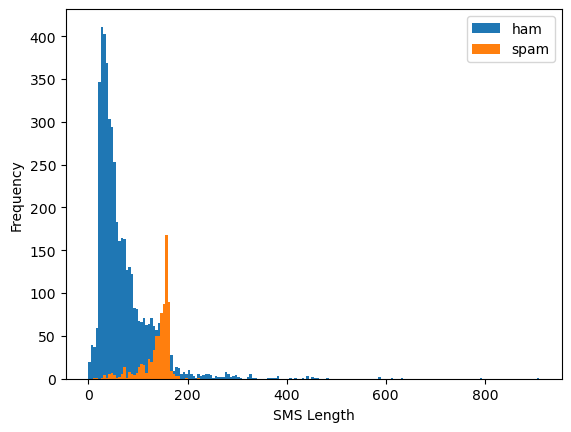

In [236]:
df['sms_len'] = df['sms'].apply(len)
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']

plt.hist(ham_df['sms_len'], bins=range(0, max(ham_df['sms_len'])+5, 5),  label='ham')
plt.hist(spam_df['sms_len'], bins=range(0, max(spam_df['sms_len'])+5, 5),  label='spam')
plt.xlabel('SMS Length')
plt.ylabel('Frequency')

plt.legend()
plt.show()


length of 'ham' messages are longer than 'spam' messages

5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

document_array = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?']


vectorizer_count = CountVectorizer()


X = vectorizer_count.fit_transform(document_array)
document_termMatrix = pd.DataFrame(X.toarray(), columns=sorted(vectorizer_count.vocabulary_))
document_termMatrix

,are,call,from,hi,home,how,money,now,or,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,1,0,1,1,0,0,2,0
2,0,1,0,1,0,0,0,1,1,1,0,1


6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'], 
                                                    df['label'],test_size=0.20, 
                                                    random_state=1)
vectorizer_count = CountVectorizer()

training_dataset = vectorizer_count.fit_transform(X_train)
testing_dataset = vectorizer_count.transform(X_test)
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_dataset,y_train);
prediction_data = naive_bayes.predict(testing_dataset)
print('Accuracy score is: {}'.format(accuracy_score(y_test, prediction_data)))
print('Precision score is: {}'.format(precision_score(y_test, prediction_data, pos_label="spam")))
print('Recall score is: {}'.format(recall_score(y_test, prediction_data,pos_label="spam")))
print('F1 score is: {}'.format(f1_score(y_test, prediction_data,pos_label="spam")))

Accuracy score is: 0.9847533632286996
Precision score is: 0.9420289855072463
Recall score is: 0.935251798561151
F1 score is: 0.9386281588447652
